#Accident Severity Prediction

##Importing Necessary Libraries

In [1]:
%pip install pycaret

  Using cached scikit_learn-1.4.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached werkzeug-3.0.6-py3-none-any.whl.metadata (3.7 kB)
Using cached scikit_learn-1.4.2-cp310-cp310-win_amd64.whl (10.6 MB)
Using cached werkzeug-3.0.6-py3-none-any.whl (227 kB)
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask-migrate 3.1.0 requires Flask-SQLAlchemy>=1.0, which is not installed.
flask-security 5.5.2 requires Flask>=3.0.0, but you have flask 2.2.5 which is incompatible.

[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import shap
from pycaret.classification import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import SelectKBest

In [5]:
df=pd.read_excel('RTA Dataset Final.xlsx')

In [6]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [9]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [10]:
df.shape

(12316, 33)

In [11]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

#Exploratory Data Analysis

In [14]:
cat_cols=df.drop(columns=['Time','Number_of_vehicles_involved','Number_of_casualties'],axis=1).columns

In [15]:
for col in cat_cols:
  print(col)
  print(df[col].value_counts())

Day_of_week
Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64
Age_band_of_driver
Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64
Sex_of_driver
Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64
Educational_level
Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64
Vehicle_driver_relation
Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64
Driving_experience
Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: 

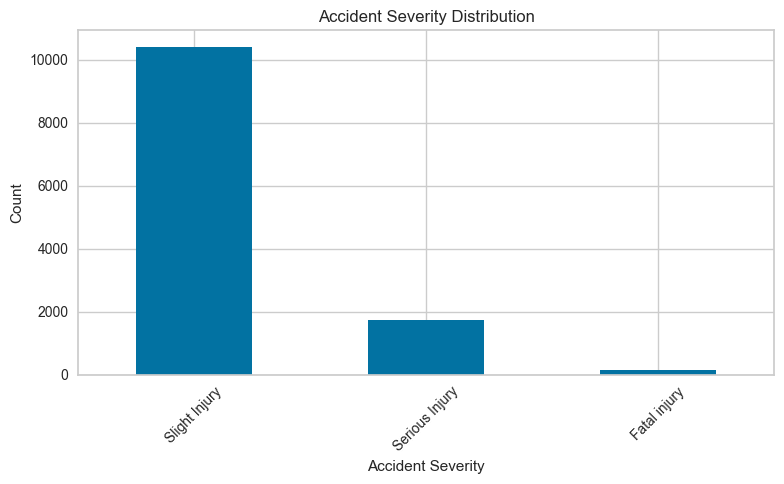

In [16]:


# Accident Severity Distribution
plt.figure(figsize=(8, 5))
df['Accident_severity'].value_counts().plot(kind='bar')
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

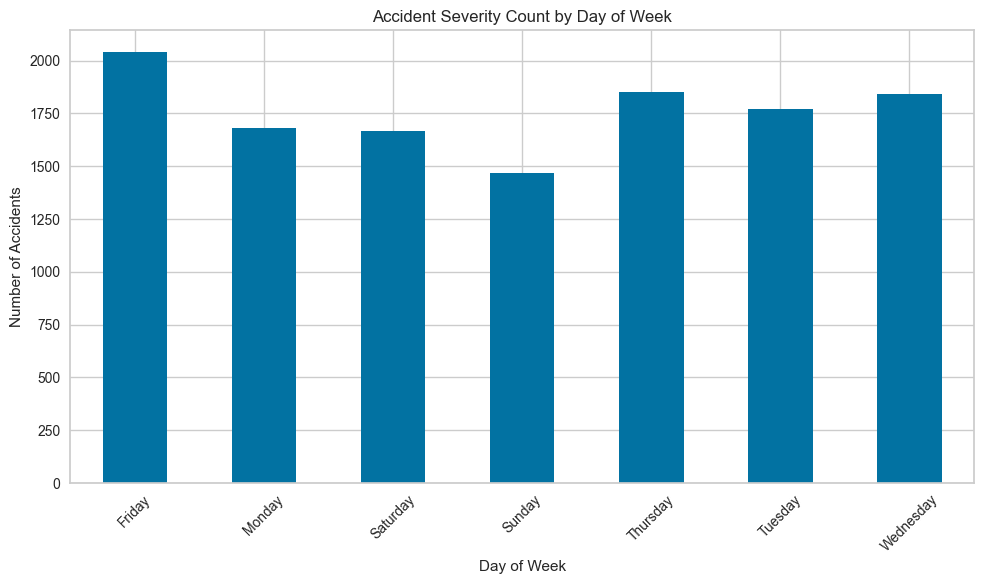

In [17]:
#  Day of Week vs Accident Severity Count
plt.figure(figsize=(10, 6))
df.groupby('Day_of_week')['Accident_severity'].count().plot(kind='bar')
plt.title('Accident Severity Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

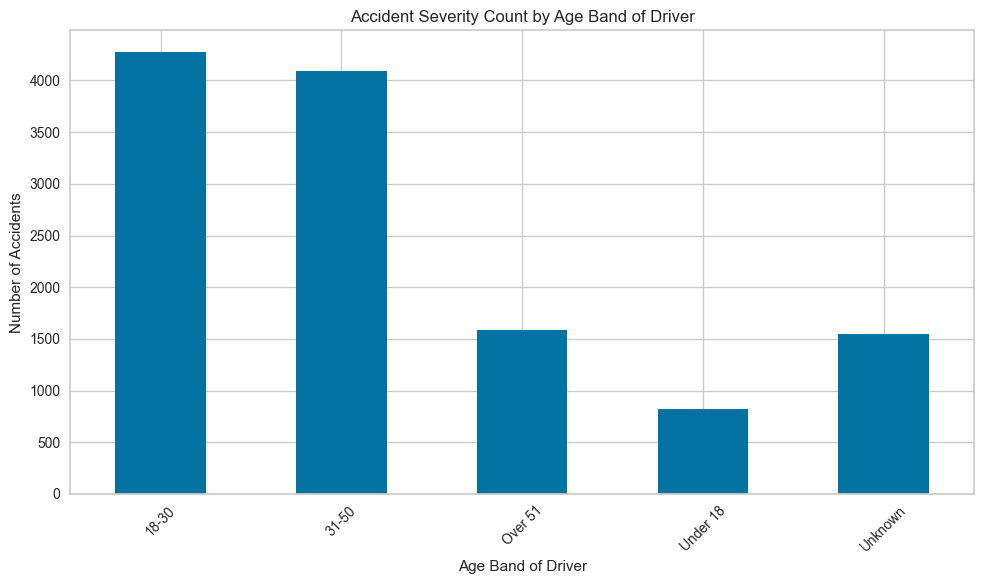

In [18]:
# Age Band of Driver vs Accident Severity
plt.figure(figsize=(10, 6))
df.groupby('Age_band_of_driver')['Accident_severity'].count().plot(kind='bar')
plt.title('Accident Severity Count by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

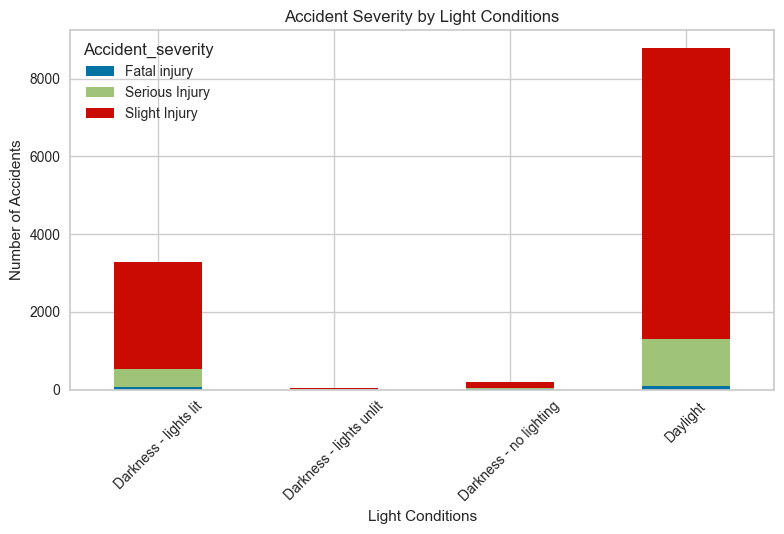

In [19]:

# Light Conditions vs Accident Severity
plt.figure(figsize=(10, 6))
df.groupby(['Light_conditions', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

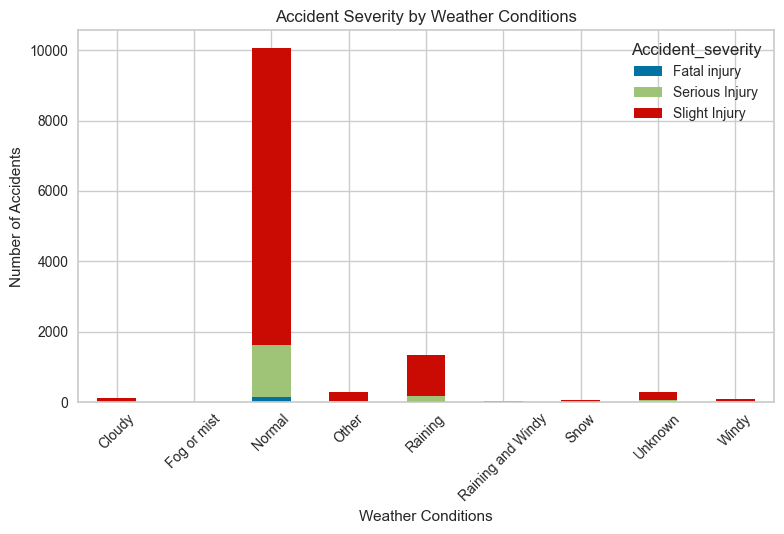

In [20]:
# Weather Conditions vs Accident Severity
plt.figure(figsize=(10, 6))
df.groupby(['Weather_conditions', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

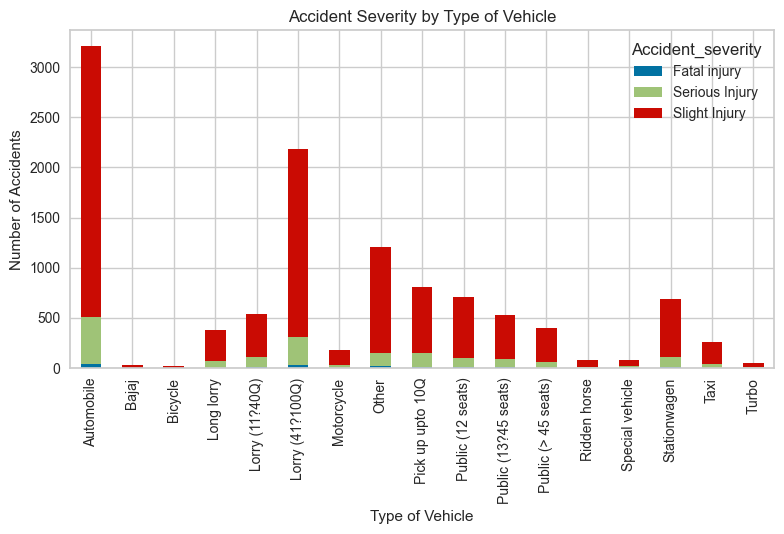

In [21]:

# Type of Vehicle vs Accident Severity
plt.figure(figsize=(12, 6))
df.groupby(['Type_of_vehicle', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

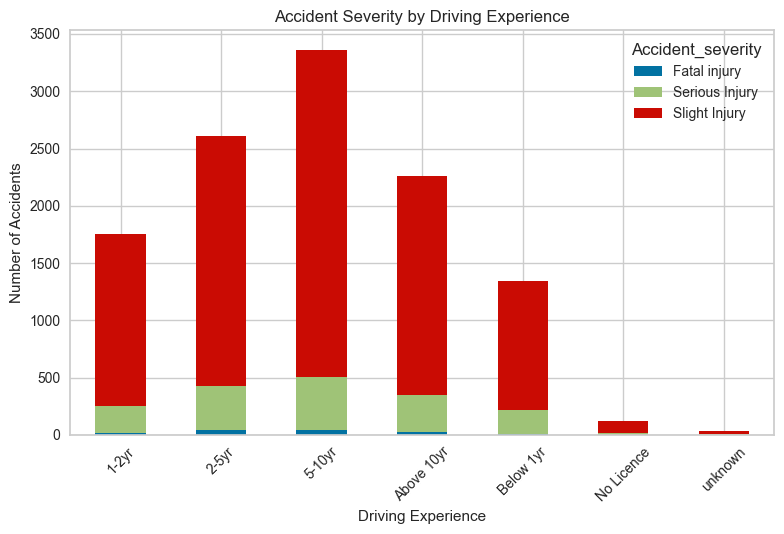

In [22]:
# Driving Experience vs Accident Severity
plt.figure(figsize=(12, 6))
df.groupby(['Driving_experience', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Driving Experience')
plt.xlabel('Driving Experience')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

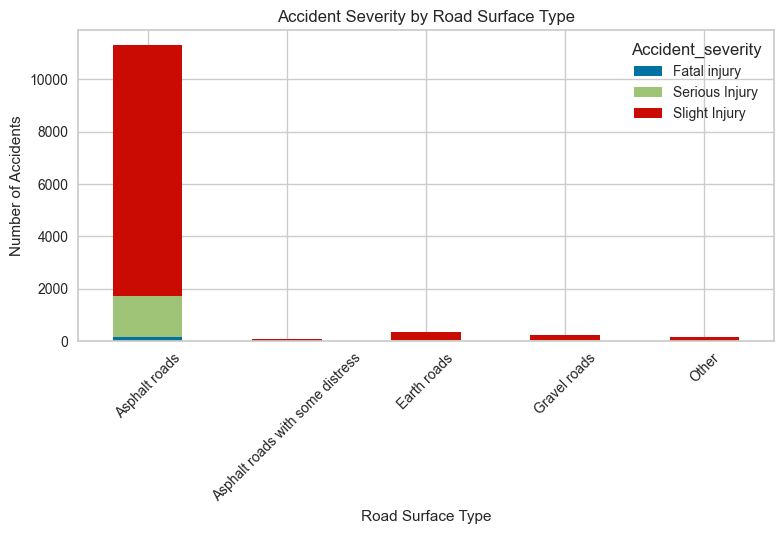

In [23]:

# Road Surface Type vs Accident Severity
plt.figure(figsize=(10, 6))
df.groupby(['Road_surface_type', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Road Surface Type')
plt.xlabel('Road Surface Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

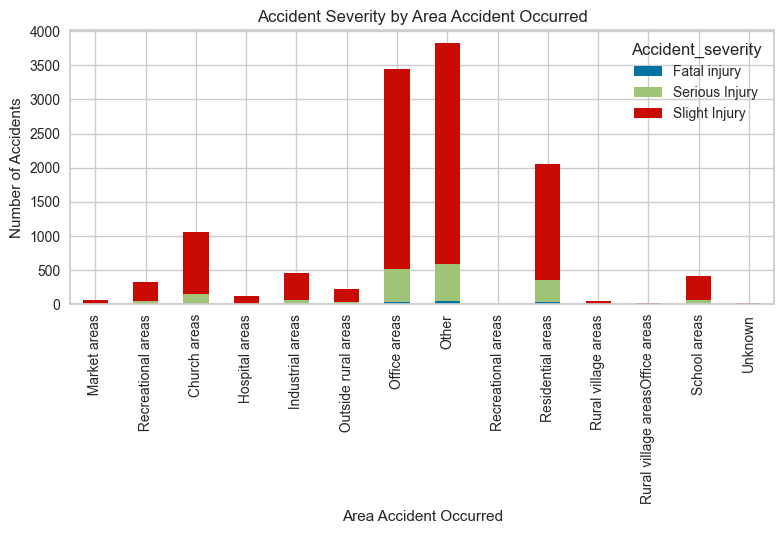

In [24]:
# Area Accident Occurred vs Accident Severity
plt.figure(figsize=(12, 6))
df.groupby(['Area_accident_occured', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Area Accident Occurred')
plt.xlabel('Area Accident Occurred')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

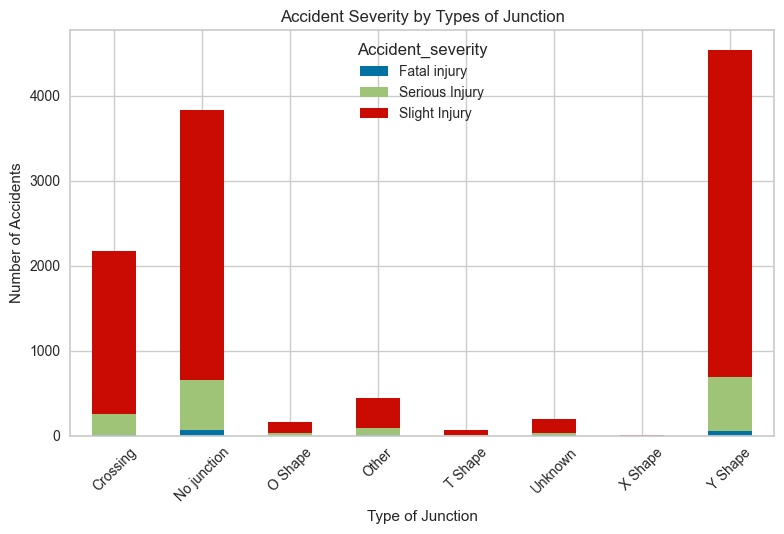

In [25]:
# Types of Junction vs Accident Severity
plt.figure(figsize=(10, 6))
df.groupby(['Types_of_Junction', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Types of Junction')
plt.xlabel('Type of Junction')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

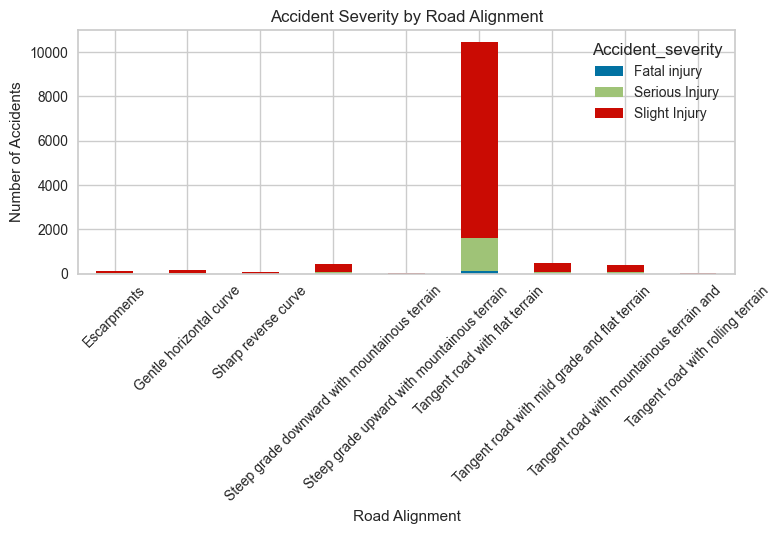

In [26]:
# Road Alignment vs Accident Severity
plt.figure(figsize=(10, 6))
df.groupby(['Road_allignment', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Road Alignment')
plt.xlabel('Road Alignment')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

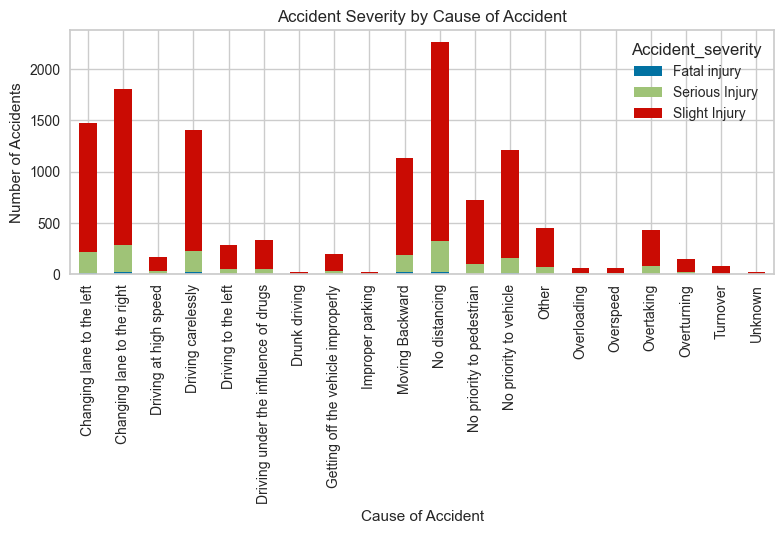

In [27]:

# Cause of Accident vs Accident Severity
plt.figure(figsize=(15, 6))
df.groupby(['Cause_of_accident', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Cause of Accident')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

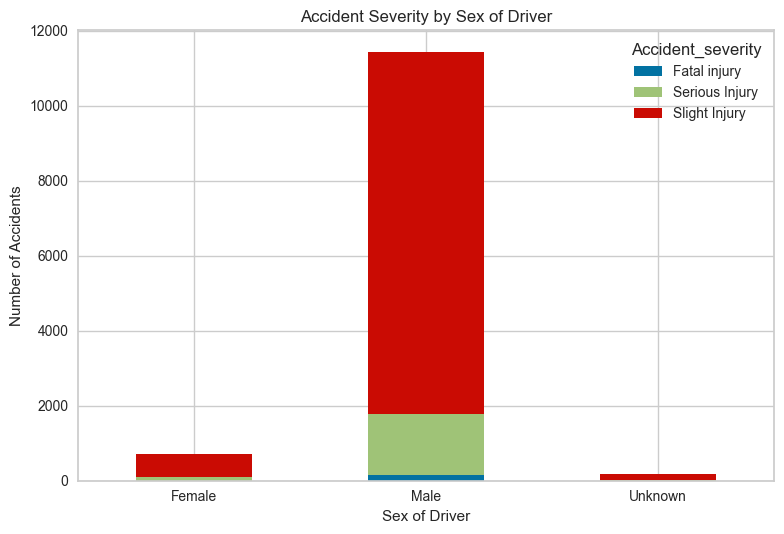

In [28]:
# Sex of Driver vs Accident Severity
plt.figure(figsize=(8, 5))
df.groupby(['Sex_of_driver', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Sex of Driver')
plt.xlabel('Sex of Driver')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

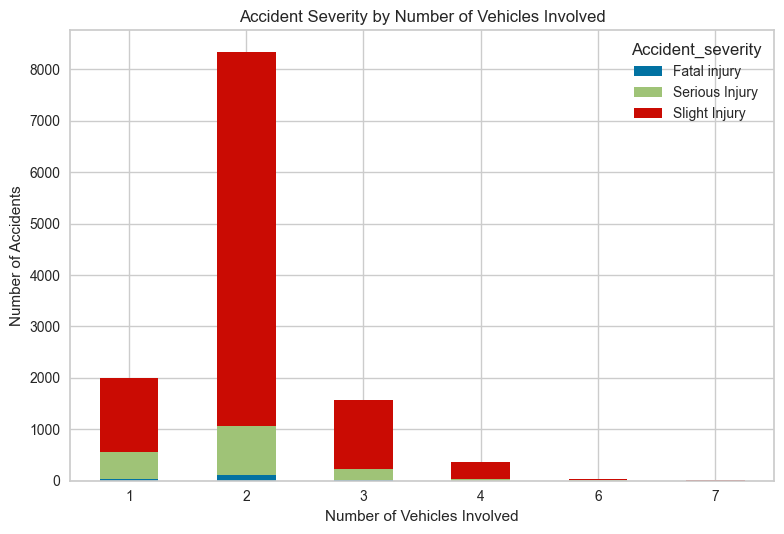

In [29]:
# Number of Vehicles Involved vs Accident Severity
plt.figure(figsize=(10, 6))
df.groupby(['Number_of_vehicles_involved', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Number of Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

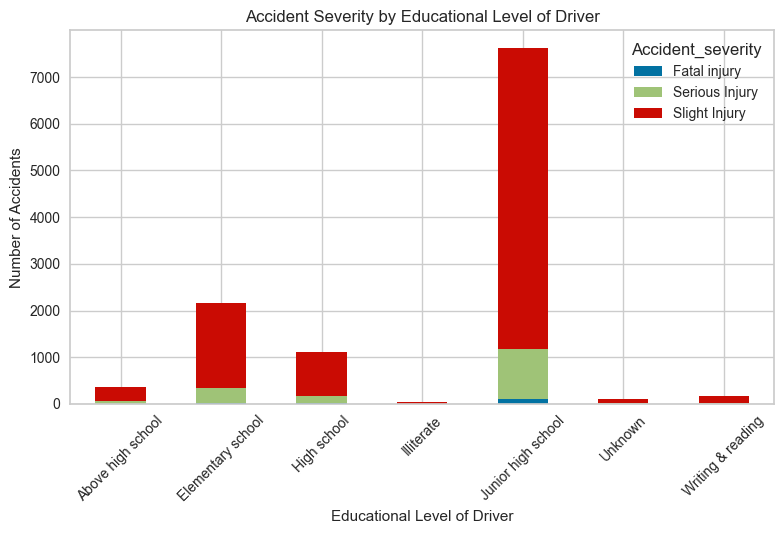

In [30]:
# Educational Level of Driver vs Accident Severity
plt.figure(figsize=(12, 6))
df.groupby(['Educational_level', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Educational Level of Driver')
plt.xlabel('Educational Level of Driver')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

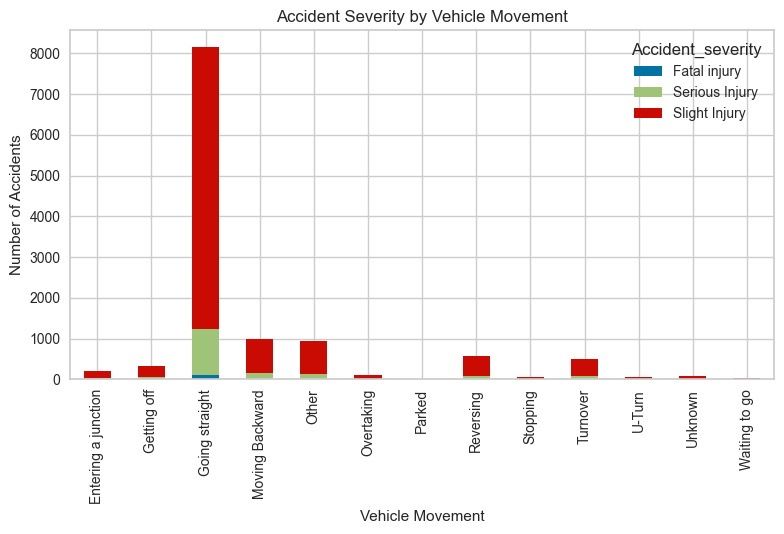

In [31]:
# Vehicle Movement vs Accident Severity
plt.figure(figsize=(15, 6))
df.groupby(['Vehicle_movement', 'Accident_severity']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Accident Severity by Vehicle Movement')
plt.xlabel('Vehicle Movement')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Basic Model using PyCaret

In [32]:
clf = setup(data=df, target='Accident_severity', session_id=123)

,Description,Value
0,Session id,123
1,Target,Accident_severity
2,Target type,Multiclass
3,Target mapping,"Fatal injury: 0, Serious Injury: 1, Slight Injury: 2"
4,Original data shape,"(12316, 33)"
5,Transformed data shape,"(12316, 207)"
6,Transformed train set shape,"(8621, 207)"
7,Transformed test set shape,"(3695, 207)"
8,Numeric features,3
9,Categorical features,29


In [33]:
#Finalized Set of features based on trials & insights
cols = ['Day_of_week', 'Area_accident_occured', 'Types_of_Junction',
 'Cause_of_accident', 'Type_of_collision', 'Number_of_vehicles_involved',
 'Type_of_vehicle', 'Service_year_of_vehicle', 'Vehicle_driver_relation',
 'Driving_experience', 'Age_band_of_driver', 'Sex_of_driver',
 'Educational_level', 'Number_of_casualties', 'Sex_of_casualty',
 'Age_band_of_casualty']

#Model Training

In [34]:
sel_df = df[cols]
target = df['Accident_severity']

In [35]:
sel_df.nunique()

Day_of_week                     7
Area_accident_occured          14
Types_of_Junction               8
Cause_of_accident              20
Type_of_collision              10
Number_of_vehicles_involved     6
Type_of_vehicle                17
Service_year_of_vehicle         6
Vehicle_driver_relation         4
Driving_experience              7
Age_band_of_driver              5
Sex_of_driver                   3
Educational_level               7
Number_of_casualties            8
Sex_of_casualty                 3
Age_band_of_casualty            6
dtype: int64

In [36]:
sel_df_final = sel_df.copy()

In [37]:
# Replacing not available informations with unknown
sel_df_final['Educational_level'] = sel_df_final['Educational_level'].fillna('Unknown')
sel_df_final['Type_of_collision'] = sel_df_final['Type_of_collision'].fillna('Unknown')
sel_df_final['Area_accident_occured'] = sel_df_final['Area_accident_occured'].fillna('Unknown')
sel_df_final['Driving_experience'] = sel_df_final['Driving_experience'].fillna('unknown')
sel_df_final['Service_year_of_vehicle'] = sel_df_final['Service_year_of_vehicle'].fillna('Unknown')
sel_df_final['Types_of_Junction'] = sel_df_final['Types_of_Junction'].fillna('Unknown')
sel_df_final['Type_of_vehicle'] = sel_df_final['Type_of_vehicle'].fillna('Other')
sel_df_final['Vehicle_driver_relation'] = sel_df_final['Vehicle_driver_relation'].fillna('Unknown')

In [38]:
X = sel_df_final[cols]
y = target

In [39]:
encoded_df = sel_df.copy()
label_encoders = {}

for col in sel_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(sel_df[col].astype(str))
    label_encoders[col] = le

# Encoding the target variable
target_encoder = LabelEncoder()
encoded_target = target_encoder.fit_transform(target)

In [40]:
#Lasso Feature Importance
label_encoders = {}
encoded_dff = sel_df.copy()

for col in sel_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    encoded_dff[col] = le.fit_transform(sel_df[col].astype(str))
    label_encoders[col] = le

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(encoded_dff)
y = LabelEncoder().fit_transform(target)

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': sel_df.columns,
    'Importance': np.abs(lasso.coef_)
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                        Feature  Importance
5   Number_of_vehicles_involved    0.039826
13         Number_of_casualties    0.014110
15         Age_band_of_casualty    0.002569
4             Type_of_collision    0.002062
1         Area_accident_occured    0.000991
6               Type_of_vehicle    0.000453
2             Types_of_Junction    0.000373
3             Cause_of_accident    0.000281
0                   Day_of_week    0.000000
7       Service_year_of_vehicle    0.000000
8       Vehicle_driver_relation    0.000000
9            Driving_experience    0.000000
10           Age_band_of_driver    0.000000
11                Sex_of_driver    0.000000
12            Educational_level    0.000000
14              Sex_of_casualty    0.000000


In [41]:
# Applying SMOTE to increase record count since base model accuracy was low
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(encoded_df, encoded_target)

X_resampled_df = pd.DataFrame(X_resampled, columns=encoded_df.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Accident_severity'])

print("Original dataset shape:", encoded_df.shape)
print("Resampled dataset shape:", X_resampled_df.shape)

Original dataset shape: (12316, 16)
Resampled dataset shape: (31245, 16)


In [42]:
# Splitting the data into train and test
X_trn, X_tst, y_trn, y_tst = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=3)

# XGBoost Model
model = XGBClassifier(n_estimators=800, max_depth=20, random_state=3)
model.fit(X_trn, y_trn)
predics = model.predict(X_tst)

In [43]:
print("Accuracy:",model.score(X_trn, y_trn))

Accuracy: 1.0


In [44]:
print(classification_report(y_tst, predics))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2080
           1       0.89      0.89      0.89      2079
           2       0.89      0.88      0.88      2090

    accuracy                           0.92      6249
   macro avg       0.92      0.92      0.92      6249
weighted avg       0.92      0.92      0.92      6249



<Figure size 1000x600 with 0 Axes>

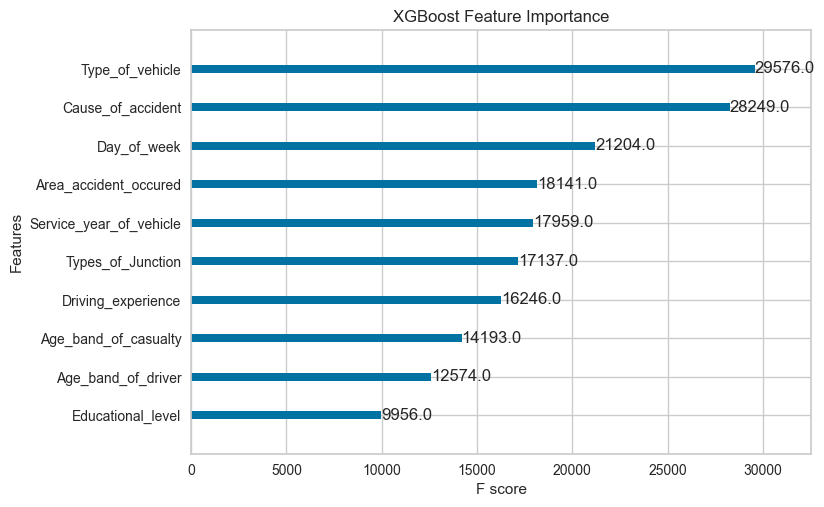

In [45]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)  # Show top 10 important features
plt.title("XGBoost Feature Importance")
plt.show()

In [46]:
import pickle

# Save model
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save label encoders
with open('label_encoders.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoders, encoder_file)

# Save target encoder (optional, in case you need to decode predictions)
with open('target_encoder.pkl', 'wb') as target_file:
    pickle.dump(target_encoder, target_file)


In [47]:
# Load model
with open('xgboost_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load label encoders
with open('label_encoders.pkl', 'rb') as encoder_file:
    loaded_label_encoders = pickle.load(encoder_file)

# Load target encoder
with open('target_encoder.pkl', 'rb') as target_file:
    loaded_target_encoder = pickle.load(target_file)

In [48]:
custom_input = {
    'Day_of_week': 'Monday',  # ✅ Matches dataset
    'Area_accident_occured': 'Residential areas',  # ❌ 'Urban' not in dataset; changed to closest match
    'Types_of_Junction': 'Crossing',  # ✅ Matches dataset
    'Cause_of_accident': 'Overtaking',  # ❌ 'Overspeeding' not in dataset; changed to closest match
    'Type_of_collision': 'Vehicle with vehicle collision',  # ❌ 'Rear-end' not in dataset; changed to closest match
    'Number_of_vehicles_involved': 2,  # ✅ Matches dataset
    'Type_of_vehicle': 'Automobile',  # ❌ 'Car' not in dataset; changed to closest match
    'Service_year_of_vehicle': '5-10yrs',  # ❌ '5' numeric; changed to closest match
    'Vehicle_driver_relation': 'Owner',  # ✅ Matches dataset
    'Driving_experience': '2-5yr',  # ❌ '2-5 years' not in dataset; changed to correct format
    'Age_band_of_driver': '18-30',  # ✅ Matches dataset
    'Sex_of_driver': 'Male',  # ✅ Matches dataset
    'Educational_level': 'High school',  # ❌ 'High School' not in dataset; changed to correct format
    'Number_of_casualties': 1,  # ✅ Matches dataset
    'Sex_of_casualty': 'Male',  # ❌ 'Female' not in dataset for some cases; switched to 'Male'
    'Age_band_of_casualty': 'Under 18'  # ✅ Matches dataset
}


In [49]:
custom_input_df = pd.DataFrame([custom_input])

# Encode categorical variables using saved encoders
for col in custom_input_df.select_dtypes(include=['object']).columns:
    if col in loaded_label_encoders:
        custom_input_df[col] = loaded_label_encoders[col].transform(custom_input_df[col])
    else:
        raise ValueError(f"Unexpected category in column: {col}. Model was not trained on this value.")

# Ensure the feature order matches training data
custom_input_df = custom_input_df[cols]  # `cols` is the original feature order used in training

# Make prediction
prediction = loaded_model.predict(custom_input_df)

# Decode prediction using target encoder
decoded_prediction = loaded_target_encoder.inverse_transform(prediction)

print("Predicted Accident Severity:", decoded_prediction[0])

Predicted Accident Severity: Slight Injury


In [50]:
display(sel_df)

,Day_of_week,Area_accident_occured,Types_of_Junction,Cause_of_accident,Type_of_collision,Number_of_vehicles_involved,Type_of_vehicle,Service_year_of_vehicle,Vehicle_driver_relation,Driving_experience,Age_band_of_driver,Sex_of_driver,Educational_level,Number_of_casualties,Sex_of_casualty,Age_band_of_casualty
0,Monday,Residential areas,No junction,Moving Backward,Collision with roadside-parked vehicles,2,Automobile,Above 10yr,Employee,1-2yr,18-30,Male,Above high school,2,na,na
1,Monday,Office areas,No junction,Overtaking,Vehicle with vehicle collision,2,Public (> 45 seats),5-10yrs,Employee,Above 10yr,31-50,Male,Junior high school,2,na,na
2,Monday,Recreational areas,No junction,Changing lane to the left,Collision with roadside objects,2,Lorry (41?100Q),NaN,Employee,1-2yr,18-30,Male,Junior high school,2,Male,31-50
3,Sunday,Office areas,Y Shape,Changing lane to the right,Vehicle with vehicle collision,2,Public (> 45 seats),NaN,Employee,5-10yr,18-30,Male,Junior high school,2,Female,18-30
4,Sunday,Industrial areas,Y Shape,Overtaking,Vehicle with vehicle collision,2,NaN,5-10yrs,Employee,2-5yr,18-30,Male,Junior high school,2,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,Outside rural areas,No junction,No distancing,Vehicle with vehicle collision,2,Lorry (11?40Q),NaN,Employee,2-5yr,31-50,Male,NaN,1,na,na
12312,Sunday,Outside rural areas,No junction,No distancing,Vehicle with vehicle collision,2,Automobile,NaN,Employee,5-10yr,Unknown,Male,Elementary school,1,na,na
12313,Sunday,Outside rural areas,No junction,Changing lane to the right,Vehicle with vehicle collision,1,Bajaj,2-5yrs,Employee,5-10yr,Over 51,Male,Junior high school,1,Male,31-50
12314,Sunday,Office areas,No junction,Driving under the influence of drugs,Vehicle with vehicle collision,2,Lorry (41?100Q),2-5yrs,Employee,Above 10yr,18-30,Female,Junior high school,1,na,na
